# Analysis of Life Expectancy and GDP Data from WHO
## Introduction
In this analysis, I served as a data researcher for the International Headquarter of Empathy And Logic (IHEAL). My goal was to explore the relationship between a country's GDP and its life expectancy, supporting the organization's belief that a nation's wealth influences the life expectancy of its people. The data was sourced from the World Bank and the World Health Organization.

Key Question: Is there a correlation between a country's GDP and its life expectaddress socio-economic inequalities globally.

# Data Summary
First i will import library i will need to use in the future for analytics. After that, i import csv file by `read_csv`, then turn dataframe to a pivort table to have a clearly look at some data indicate.
The dataset includes information on GDP and life expectancy for six countries. A brief overview shows:

- **United States**: Highest GDP \(\~\$14 trillion\) but not the highest life expectancy\.
- **Zimbabwe**: Lowest GDP \(\~\$9 billion\) and lowest life expectancy \(mean of 50 years\)\.
- **Germany**: Highest life expectancy with a GDP of \~\$3 trillion\.


In [1]:
# import model need to use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv('all_data.csv')
# Make a brief pivort data to check the data overall.
pivot_country = data.pivot_table(index = 'Country',
                            values = ['Life expectancy at birth (years)','GDP'],
                            aggfunc={'Life expectancy at birth (years)': 'mean',
                                     'GDP': 'mean'}).reset_index()

# Function to format numbers as currency
def format_currency(x):
    return "${:,.2f}".format(x)

# Apply currency formatting to GDP columns
gdp_columns = [col for col in pivot_country.columns if 'GDP' in col]
pivot_country[gdp_columns] = pivot_country[gdp_columns].map(format_currency)
display(pivot_country)

,Country,GDP,Life expectancy at birth (years)
0,Chile,"$169,788,845,015.31",78.94375
1,China,"$4,957,713,750,000.00",74.26250
2,Germany,"$3,094,775,625,000.00",79.65625
3,Mexico,"$976,650,625,000.00",75.71875
4,United States of America,"$14,075,000,000,000.00",78.06250
5,Zimbabwe,"$9,062,579,595.06",50.09375


# Analytics
## Life Expectancy Trends (2000-2014)
Base on the `figure1` and table below Zimbabwe experienced the most dramatic rise in life expectancy, increasing by 28%, from around 40 years in 2000 to approximately 60 years by 2014. This notable improvement can be attributed to significant health interventions and recovery from the HIV/AIDS epidemic.

In contrast, other countries saw more gradual increases in life expectancy over the same period. For example:

- Chile and Germany: Both countries maintained consistently high life expectancies, ranging from the mid-70s to the low-80s, with a modest increase of about 2% to 3%.
- China and Mexico: These countries showed steady improvements in life expectancy, growing by around 4% to 5% over the period. China rose from around 70 to 75 years, while Mexico increased from 75 to nearly 77 years.
- United States: Life expectancy in the U.S. increased by approximately 2%, rising from around 76 years in 2000 to about 78 years in 2014.

Overall, while Zimbabwe showed the most rapid growth in life expectancy, other nations experienced more stable and consistent increases during the same period.

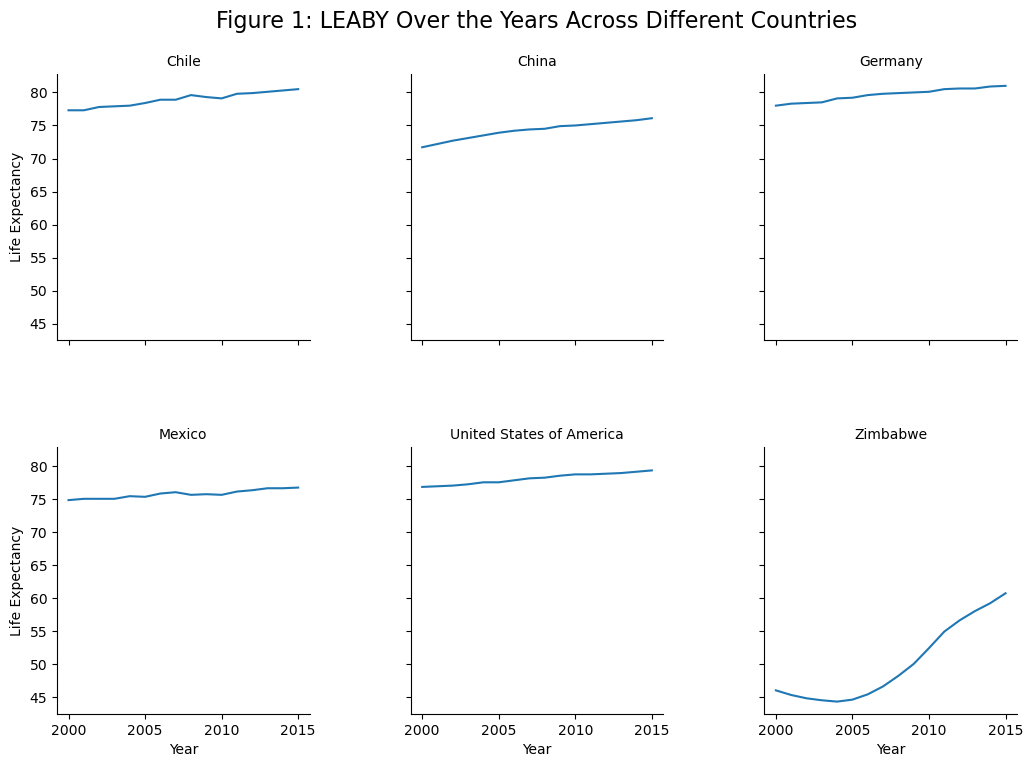

Year,2000,2014,percentage_increase
Country,,,
Chile,77.3,80.3,3.880983
China,71.7,75.8,5.718271
Germany,78.0,80.9,3.717949
Mexico,74.8,76.6,2.406417
United States of America,76.8,79.1,2.994792
Zimbabwe,46.0,59.2,28.695652


<Figure size 640x480 with 0 Axes>

In [2]:
# Set the figure size and rename life expectancy columns to LEABY
figure_size = (10, 8)
data.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)
# 1. Has life expectancy increased over time in the six nations?
## Using FacetGrid
g = sns.FacetGrid(data, col='Country', col_wrap=3, height=4)
g.map(sns.lineplot, 'Year', 'LEABY')
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy')
g.fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
g.fig.suptitle('Figure 1: LEABY Over the Years Across Different Countries', fontsize=16)
plt.show()
plt.clf()
g.savefig('figure1.png')
# Calculate percentage increase in LEABY from 2000 to 2014 for all countries
filter_data = data[data['Year'].isin([2000, 2014])]
pivot_leaby = filter_data.pivot_table(index='Country', values='LEABY', columns='Year', aggfunc='mean')
pivot_leaby['percentage_increase'] = ((pivot_leaby[2014] - pivot_leaby[2000]) / pivot_leaby[2000]) * 100
display(pivot_leaby)

## GPD across nations
Between 2000 and 2014, the GDP of the six nations analyzed in the provided dataset has generally increased, with varying degrees of growth. China exhibited the most remarkable rise, with a staggering 765.3% increase, elevating its GDP from approximately $1.2 trillion to over $10.4 trillion. This substantial growth underscores China's rapid economic expansion during this period.

Chile also showed a significant increase, with a 235.2% rise in GDP, indicating strong economic performance. Zimbabwe, despite starting from a lower base, managed a 137.5% increase, showing recovery and growth, albeit with fluctuations in the earlier years.

Germany and Mexico demonstrated steady but moderate GDP growth, with increases of 99.5% and 89.9%, respectively. These countries maintained a consistent upward trajectory, though less dramatic compared to China or Chile.

The United States, while still showing a healthy increase of 68.9%, had the slowest GDP growth among the six nations. This slower growth reflects the more mature state of its economy during this period.

In summary, all six nations saw their GDP increase over time, with China leading the charge in terms of percentage growth, while the United States had more modest gains.

Year,Country,2000,2014,percentage_increase
0,Chile,7.786093e+10,2.609900e+11,235.200200
1,China,1.211350e+12,1.048240e+13,765.348578
2,Germany,1.949950e+12,3.890610e+12,99.523578
3,Mexico,6.836480e+11,1.298460e+12,89.931076
4,United States of America,1.030000e+13,1.740000e+13,68.932039
5,Zimbabwe,6.689958e+09,1.589105e+10,137.535874


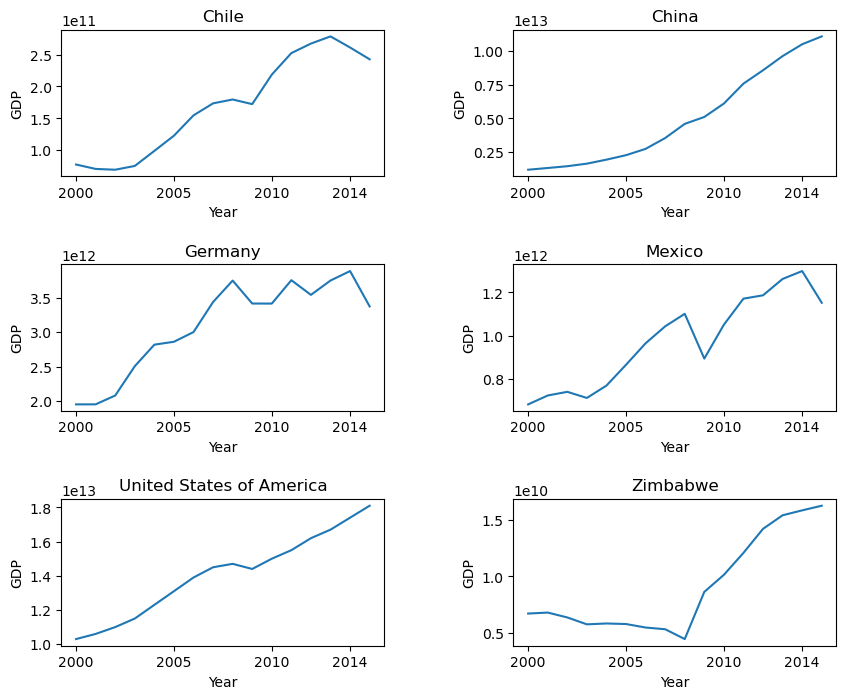

In [3]:
# 2. Has GDP increased over time in the six nations?
tick_positions = [2000, 2005, 2010, 2014]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=figure_size)
axes = axes.flatten()
countries = data.Country.unique()
for i, country in enumerate(countries):
    axes[i].plot(data.Year[data['Country'] == country], data.GDP[data['Country'] == country])
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP')
    axes[i].set_xticks(tick_positions)
    axes[i].set_xticklabels(['2000', '2005', '2010', '2014'])
fig.subplots_adjust(hspace=0.6, wspace=0.4)
fig.savefig('figure2.png')
# Calculate percentage increase in GDP from 2000 to 2014 for all countries
pivot_gdp = filter_data.pivot_table(index='Country', values='GDP', columns='Year', aggfunc='mean').reset_index()
pivot_gdp['percentage_increase'] = ((pivot_gdp[2014] - pivot_gdp[2000]) / pivot_gdp[2000]) * 100
display(pivot_gdp)

## Correlation between life expectancy and GDP

Base on the figure3 below we can draw some conclusion:

- Positive Correlation: As life expectancy increases, GDP tends to rise as well. The data points cluster in the upper-right quadrant, suggesting that countries with higher life expectancy tend to have stronger economies.
- 
Socioeconomic Development: The positive correlation implies that improved living conditions, healthcare, and economic prosperity contribute to longer life expectancy. Countries with higher GDP invest more in healthcare infrastructure, education, and social services, leading to better health outcome.
- 
Policy Implications: Policymakers can use this insight to prioritize investments in healthcare, education, and economic development. Fostering economic growth can positively impact citizens’ well-being and life expectanc

.
In summary, this graph underscores the importance of socioeconomic factors in determining life expectancy.

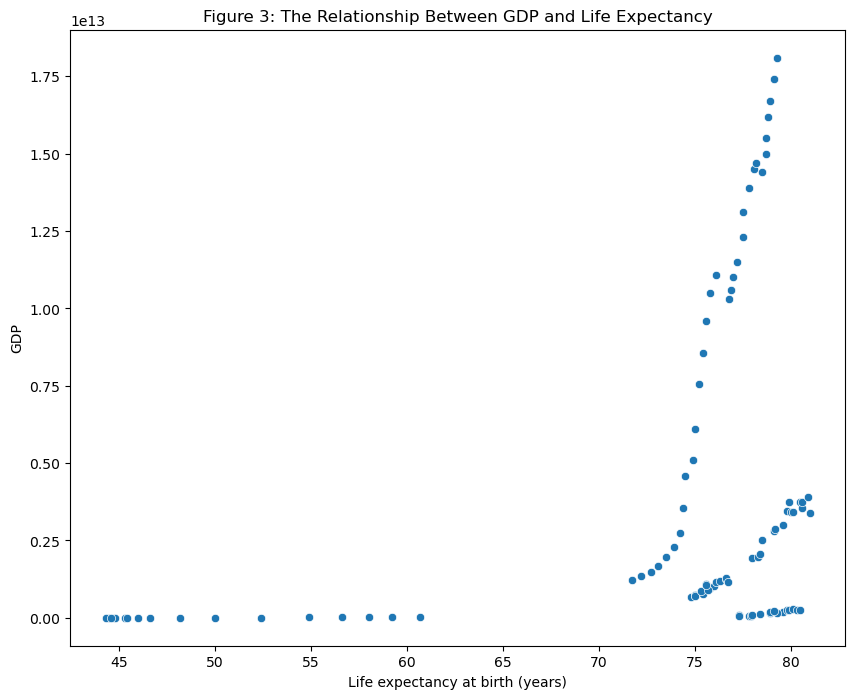

<Figure size 640x480 with 0 Axes>

In [4]:
# 3. Is there a correlation between GDP and life expectancy of a country?
plt.figure(figsize=figure_size)
sns.scatterplot(y=data['GDP'], x=data['LEABY'], data=data)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.title('Figure 3: The Relationship Between GDP and Life Expectancy')
plt.savefig('figure3.png')
plt.show()
plt.clf()

## GDP Trends Across Six Nations (2000-2014)

The graph displays the GDP trends from 2000 to 2014 for six countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe. Each country's economic performance is represented by a line graph that shows the GDP growth over the years. Here are some key observations:

### Variability Across Countries:

- **China** demonstrated the most remarkable growth, with a 765.3% increase in GDP, growing from approximately $1.2 trillion to over $10.4 trillion. This rapid rise underscores China's economic expansion during this period.
  
- **Chile** also showed significant economic growth, with a 235.2% increase in GDP, indicating a strong economic performance over the years.

- **Zimbabwe**, starting from a lower base, experienced a 137.5% increase in GDP. Despite early fluctuations, Zimbabwe's economy showed substantial recovery and growth by 2014.

- **Germany** and **Mexico** displayed steady but moderate GDP growth, with increases of 99.5% and 89.9%, respectively. Their economies maintained a consistent upward trend, albeit less dramatic than China or Chile.

- **The United States** had the slowest GDP growth among the six nations, with a 68.9% increase. This reflects the more mature and stable state of its economy during this period.

### Economic Growth and Stability:

- **China**'s and **Chile**'s rapid GDP growth are indicative of their dynamic economic environments and development policies during this period.
  
- **Zimbabwe**'s fluctuations in GDP highlight the challenges it faced but also its resilience and eventual economic recovery.

- **Germany**, **Mexico**, and **The United States** showed more stable growth, with fewer fluctuations, indicating economic maturity and stability.

### Policy Implications:

- These GDP trends provide valuable insights for policymakers and economists to analyze economic growth, stability, and areas needing further development. China's rapid growth and Zimbabwe's recovery are of particular interest for further analysis.

This analysis helps in understanding how different countries have fared economically over time and can guide decisions related to economic policies and investments.


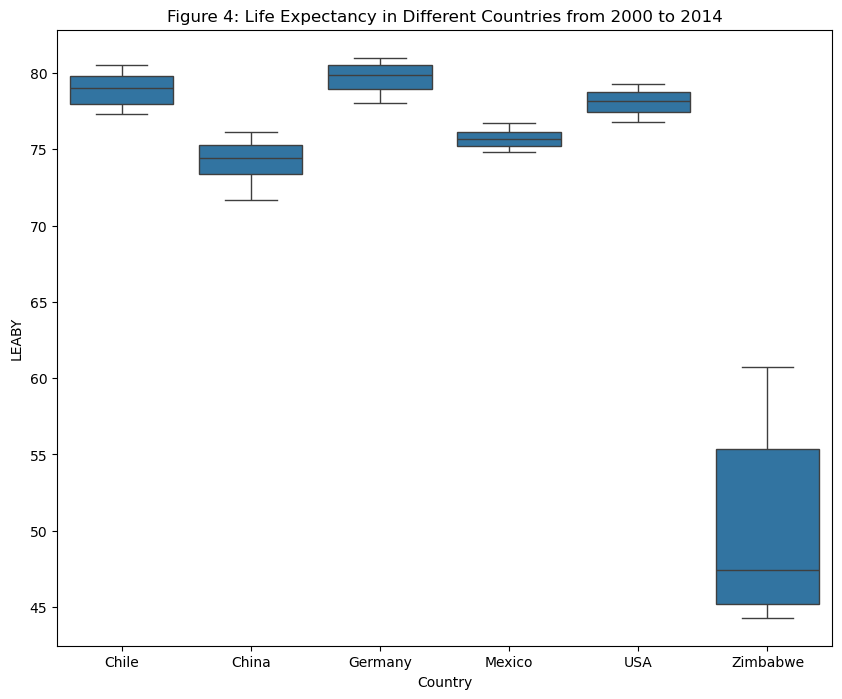

<Figure size 640x480 with 0 Axes>

In [5]:
# 4. What is the average life expectancy in these nations?
data.Country.replace('United States of America','USA', inplace=True)
plt.figure(figsize=figure_size)
sns.boxplot(data=data, y='LEABY', x='Country')
plt.title('Figure 4: Life Expectancy in Different Countries from 2000 to 2014')
plt.savefig('figure4.png')
plt.show()
plt.clf()

In [6]:
import plotly.io as pio
pio.renderers.default = 'notebook'